In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy

In [88]:
df = pd.read_csv('/Users/mcrandom/Downloads/microsoft_stocks (1).csv')
df.head(5)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-01-12,47.540001,46.360001,47.419998,46.599998,23651900.0,40.786396
1,2015-01-13,47.910000,46.060001,46.970001,46.360001,35270600.0,40.576340
2,2015-01-14,46.240002,45.619999,45.959999,45.959999,29719600.0,40.226257
3,2015-01-15,46.380001,45.410000,46.220001,45.480000,32750800.0,39.806129
4,2015-01-16,46.279999,45.169998,45.310001,46.240002,35695300.0,40.471313


In [94]:
df = df.drop('Adj Close', axis=1) # was not asked to drop but in the predictions at the end it wants 5 features and im giving 4

In [96]:
df.describe()

,High,Low,Open,Close,Volume
count,1925.000000,1925.000000,1925.000000,1925.000000,1.925000e+03
mean,140.301455,137.482982,138.934888,138.967096,3.009687e+07
std,89.000722,87.030367,88.066413,88.062951,1.397862e+07
min,40.740002,39.720001,40.340000,40.290001,7.425600e+06
25%,61.410000,60.810001,61.009998,61.119999,2.150010e+07
50%,108.739998,106.290001,107.860001,107.639999,2.669610e+07
75%,215.000000,210.360001,213.100006,212.830002,3.426400e+07
max,349.670013,342.200012,344.619995,343.109985,1.691640e+08


In [98]:
df.isnull().sum()

Date      0
High      0
Low       0
Open      0
Close     0
Volume    0
dtype: int64

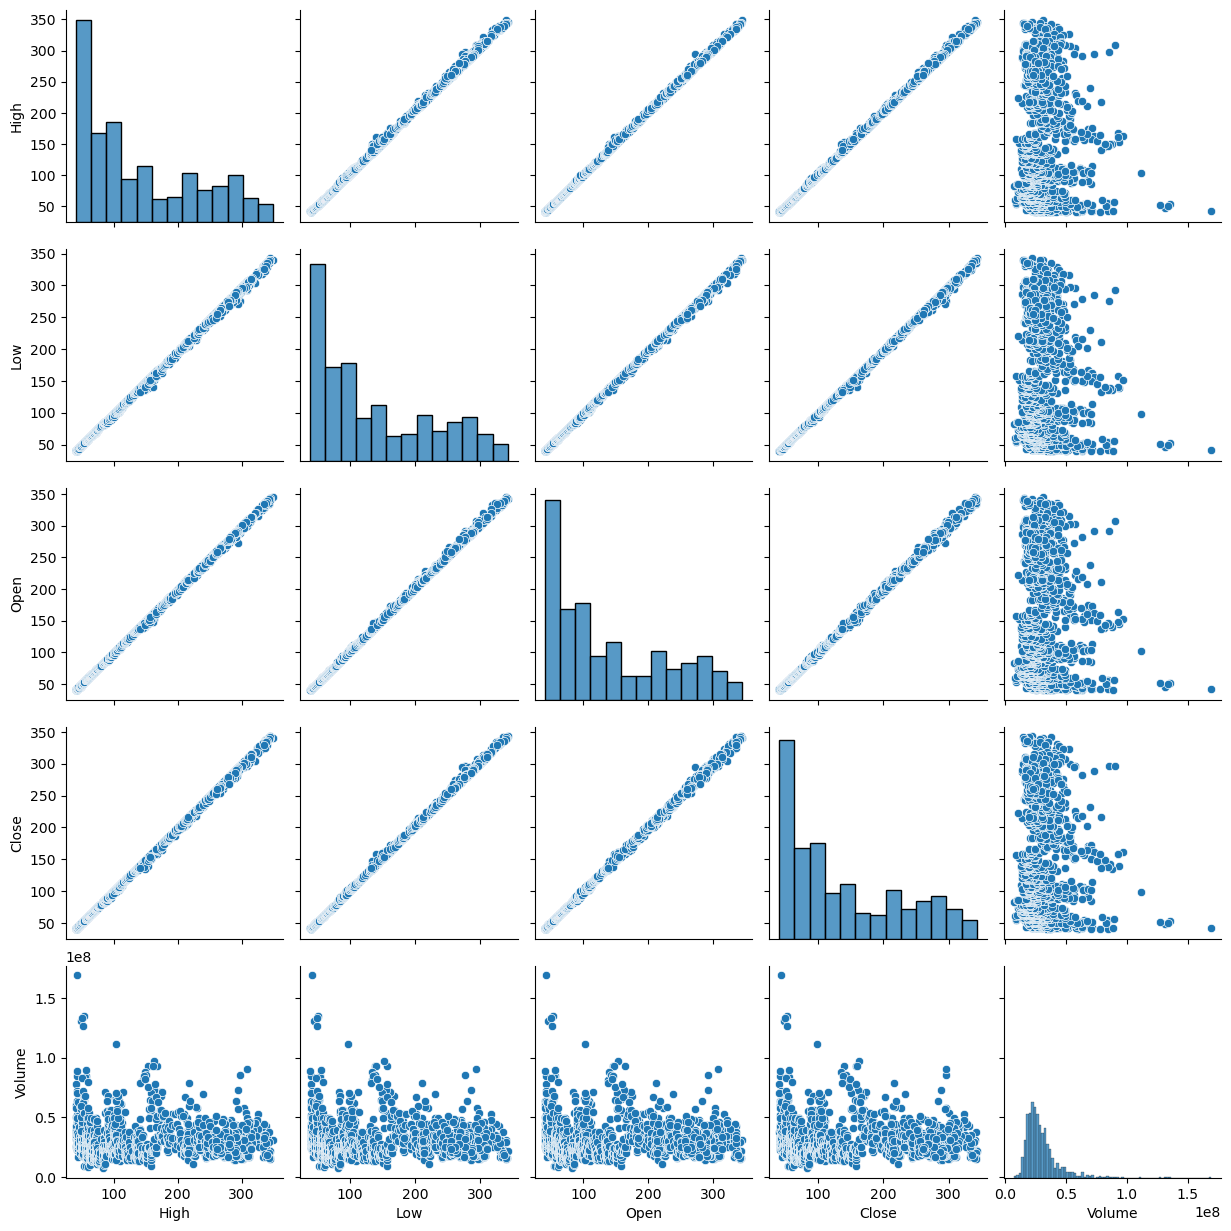

In [100]:
sns.pairplot(df, diag_kind='hist')
plt.show()

In [101]:
df

,Date,High,Low,Open,Close,Volume
0,2015-01-12,47.540001,46.360001,47.419998,46.599998,23651900.0
1,2015-01-13,47.910000,46.060001,46.970001,46.360001,35270600.0
2,2015-01-14,46.240002,45.619999,45.959999,45.959999,29719600.0
3,2015-01-15,46.380001,45.410000,46.220001,45.480000,32750800.0
4,2015-01-16,46.279999,45.169998,45.310001,46.240002,35695300.0
...,...,...,...,...,...,...
1920,2022-08-26,280.339996,267.980011,279.079987,268.089996,27549300.0
1921,2022-08-29,267.399994,263.850006,265.850006,265.230011,20338500.0
1922,2022-08-30,267.049988,260.660004,266.670013,262.970001,22767100.0
1923,2022-08-31,267.109985,261.329987,265.390015,261.470001,24791800.0


In [102]:
df['Date'] = pd.to_datetime(df['Date'])

In [106]:
df = df.set_index('Date')

In [108]:
df

,High,Low,Open,Close,Volume
Date,,,,,
2015-01-12,47.540001,46.360001,47.419998,46.599998,23651900.0
2015-01-13,47.910000,46.060001,46.970001,46.360001,35270600.0
2015-01-14,46.240002,45.619999,45.959999,45.959999,29719600.0
2015-01-15,46.380001,45.410000,46.220001,45.480000,32750800.0
2015-01-16,46.279999,45.169998,45.310001,46.240002,35695300.0
...,...,...,...,...,...
2022-08-26,280.339996,267.980011,279.079987,268.089996,27549300.0
2022-08-29,267.399994,263.850006,265.850006,265.230011,20338500.0
2022-08-30,267.049988,260.660004,266.670013,262.970001,22767100.0


In [110]:
from sklearn.model_selection import train_test_split

X = df.drop('Close', axis=1)
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [112]:
print(len(df))
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

1925
1347
1347
578
578


In [114]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [116]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(y_test, predictions)

0.6110577943057766

In [118]:
df['Close'].mean()

138.96709609192686

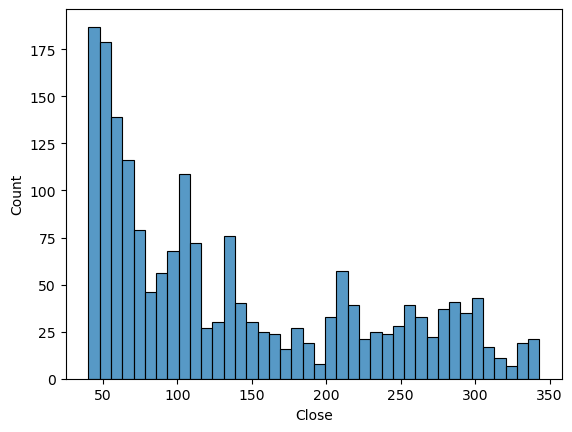

In [120]:
sns.histplot(data=df, x='Close', bins=40)
plt.show()

In [122]:
MSE = mean_squared_error(y_test, predictions)
MSE

1.0842622880495807

In [124]:
np.sqrt(MSE)

1.0412791595194733

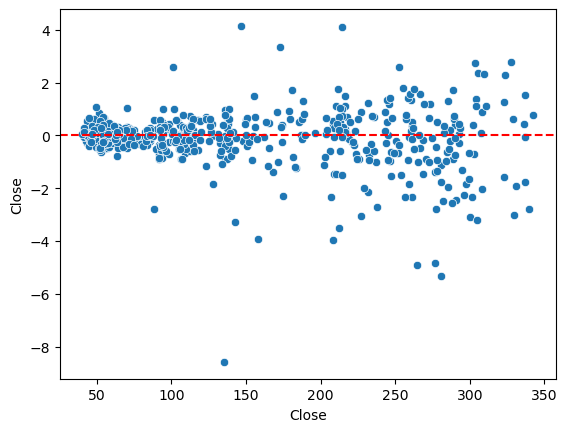

In [126]:
test_residuals = y_test - predictions
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='r', ls='--')
plt.show()

In [128]:
print("Error metric is acceptable, continueing to train entire model")

Error metric is acceptable, continueing to train entire model


In [130]:
final_model =  LinearRegression()
final_model.fit(X, y)
final_model.coef_

array([ 8.48843169e-01,  8.09827724e-01, -6.58305094e-01, -4.30962798e-09])

In [132]:
from joblib import dump, load

dump(final_model, 'final_stock_close.joblib')

['final_stock_close.joblib']

In [134]:
loaded_model = load('final_stock_close.joblib')
loaded_model.coef_

array([ 8.48843169e-01,  8.09827724e-01, -6.58305094e-01, -4.30962798e-09])

In [136]:
new_stock = np.array([[250.00,255.00,249.50,23000000.00]])

loaded_model.predict(new_stock)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([254.49750516])

In [140]:
new_stock = np.array([[260.00,265.00,259.50,21500000.00]])

loaded_model.predict(new_stock)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([264.5076276])

In [138]:
new_stock = np.array([[245.00,250.00,244.50,22000000.00]])

loaded_model.predict(new_stock)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([249.49998579])